In [1]:
!pip install ucimlrepo

In [10]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cancer = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = cancer.data.features
y = cancer.data.targets

# metadata
print(cancer.metadata)

# variable information
print(cancer.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [11]:
import pandas as pd

df = pd.DataFrame(X, columns=cancer.data.feature_names)

# correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

                     radius1  texture1  perimeter1     area1  smoothness1  \
radius1             1.000000  0.323782    0.997855  0.987357     0.170581   
texture1            0.323782  1.000000    0.329533  0.321086    -0.023389   
perimeter1          0.997855  0.329533    1.000000  0.986507     0.207278   
area1               0.987357  0.321086    0.986507  1.000000     0.177028   
smoothness1         0.170581 -0.023389    0.207278  0.177028     1.000000   
compactness1        0.506124  0.236702    0.556936  0.498502     0.659123   
concavity1          0.676764  0.302418    0.716136  0.685983     0.521984   
concave_points1     0.822529  0.293464    0.850977  0.823269     0.553695   
symmetry1           0.147741  0.071401    0.183027  0.151293     0.557775   
fractal_dimension1 -0.311631 -0.076437   -0.261477 -0.283110     0.584792   
radius2             0.679090  0.275869    0.691765  0.732562     0.301467   
texture2           -0.097317  0.386358   -0.086761 -0.066280     0.068406   

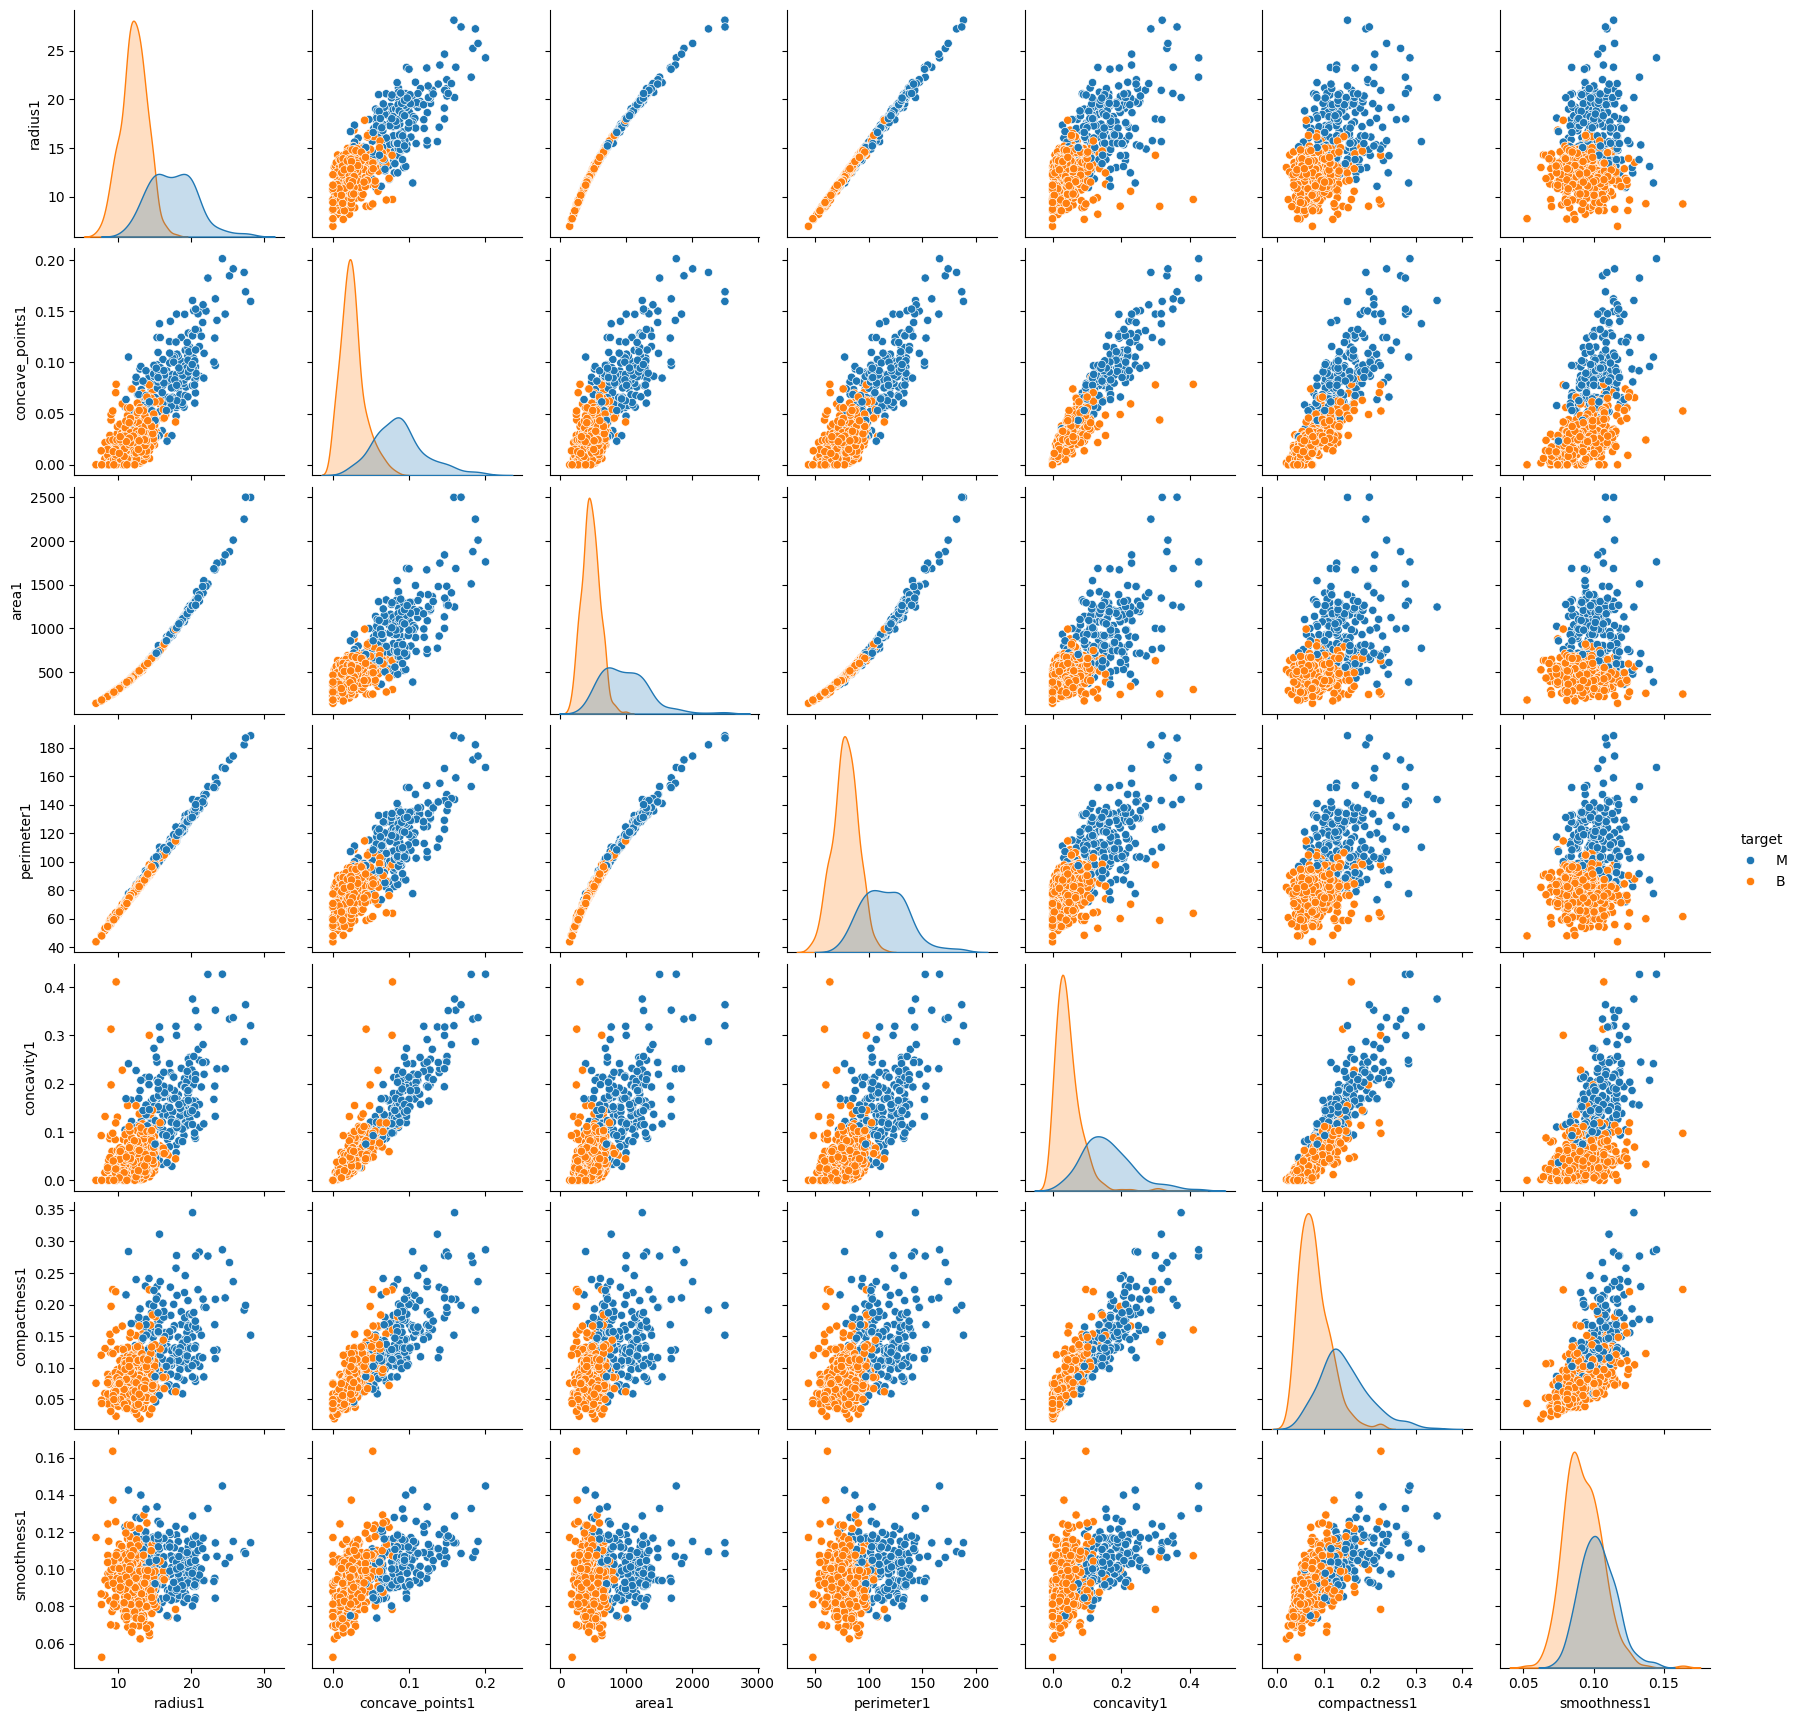

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# selected 7 features included in the pairplot
selected_features = ['radius1', 'concave_points1', 'area1', 'perimeter1', 'concavity1', 'compactness1', 'smoothness1']

df['target'] = y

sns.pairplot(df[selected_features + ['target']], hue='target', diag_kind='kde')
plt.show()


In [15]:
selected_features = ['radius1', 'concave_points1', 'area1', 'perimeter1', 'concavity1']

X_selected = df[selected_features]

X_selected.head()

,radius1,concave_points1,area1,perimeter1,concavity1
0,17.99,0.14710,1001.0,122.80,0.3001
1,20.57,0.07017,1326.0,132.90,0.0869
2,19.69,0.12790,1203.0,130.00,0.1974
3,11.42,0.10520,386.1,77.58,0.2414
4,20.29,0.10430,1297.0,135.10,0.1980


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

log_reg_model = LogisticRegression(max_iter=500)
log_reg_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=500)

In [17]:
y_pred = log_reg_model.predict(X_test)

# Evaluating model performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9122807017543859
Classification Report:
              precision    recall  f1-score   support

           B       0.90      0.97      0.93       108
           M       0.94      0.81      0.87        63

    accuracy                           0.91       171
   macro avg       0.92      0.89      0.90       171
weighted avg       0.91      0.91      0.91       171



In [27]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

y_binary = y['Diagnosis'].map({'M': 1, 'B': 0}) # Map 'M' to 1 and 'B' to 0

selected_features = ['radius1', 'concave_points1', 'area1', 'perimeter1', 'concavity1']
X_selected = X[selected_features]

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_selected, y_binary, test_size=0.2, random_state=42)

X_train_bin_const = sm.add_constant(X_train_bin)

logit_model = sm.Logit(y_train_bin, X_train_bin_const)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.186737
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:              Diagnosis   No. Observations:                  455
Model:                          Logit   Df Residuals:                      449
Method:                           MLE   Df Model:                            5
Date:                Mon, 30 Sep 2024   Pseudo R-squ.:                  0.7169
Time:                        16:57:22   Log-Likelihood:                -84.965
converged:                       True   LL-Null:                       -300.17
Covariance Type:            nonrobust   LLR p-value:                 8.261e-91
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.6693      7.930      0.337      0.736     -12.873      18.211
radius1      